# Exercise 1

In [13]:

import nltk

In [14]:
import urllib.request
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/Bordeaux')
html = response.read()
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)

In [15]:
tokens = [t for t in text.split()]
#print(tokens)

In [16]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))


Bordeaux:66
-:3
Wikipediadocument.documentElement.className:1
=:1
document.documentElement.className.replace(:1
/(^|\s)client-nojs(\s|$)/,:1
"$1client-js$2":1
);(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Bordeaux","wgTitle":"Bordeaux","wgCurRevisionId":883145603,"wgRevisionId":883145603,"wgArticleId":4097,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All:1
articles:28
dead:11
external:14
links","Articles:2
links:7
January:7
2019","Articles:1
permanently:2
links","CS1:2
French-language:4
sources:10
(fr)","Articles:1
February:11
2016","Pages:1
citations:5
lacking:2
titles","Pages:1
bare:2
URLs","CS1:1
maint::6
Archived:16
copy:3
title","CS1:1
Italian-language:2
(it)","Articles:1
German-language:4
BOT::3
original-url:3
status:3
unknown","CS1:1
(de)","CS1:1
Polish-language:2
(pl)","CS1:1
Turkish-language:2
(tr)"

byGustave:1
Eiffel,:1
bring:1
direct:1
Saint-Jean.:1
converted:1
2010:4
comprised:1
restaurants.The:1
two-track:1
Eiffel:2
limit:1
30:1
km/h:2
(19:1
mph):1
bottleneck:1
built,:1
opening:1
2009.:4
tracks:1
allows:1
(37:1
mph).[28]During:1
planning:1
lobbying:1
family:1
supporters:1
preserve:2
footbridge:1
museum:1
document:1
Gustave:1
Eiffel's:1
contribution.:1
decision:1
taken:1
save:1
plans:2
announced:1
future:1
use.:1
intact,:1
unused:1
means:1
access.Since:1
July:6
2017,:1
theLGV:1
Sud:1
Atlantiqueis:1
fully:1
operational:1
2h04:1
Paris.Air[edit]Bordeaux:1
byBordeaux–Mérignac:1
Airport,:1
8:2
(5.0:1
suburban:2
ofMérignac.Bordeaux–Mérignac:1
AirportTrams,:1
boats[edit]Tramway:1
BordeauxBordeaux:2
transport:1
system:4
calledTransports:1
Métropole(TBM).:1
company:1
run:1
Keolis:1
group.:1
network:4
of:3tram:1
lines(A,BandC)75bus:1
routes,:1
tramway:3
(from:2
96)13:1
bus:2
routes:1
16)Anelectric:1
busshuttle:1
centerA:1
boat:1
shuttle:1
riverThis:1
5:2
am.There:1
subway:1
set:1
up,:1
s

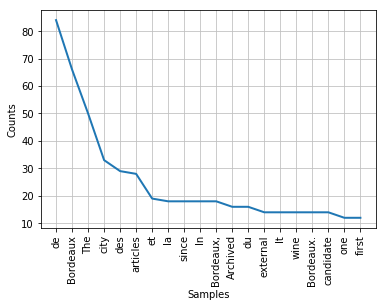

In [17]:
freq.plot(20, cumulative=False)


# Exercise 2 

In [34]:
import pandas as pd
df = pd.read_csv('winemag-data-130k-v2.csv', error_bad_lines=False);

In [35]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [36]:
df_text = df[['description']]

In [41]:
df_text

,description
0,"Aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this..."
5,Blackberry and raspberry aromas show a typical...
6,"Here's a bright, informal red that opens with ..."
7,This dry and restrained wine offers spice in p...
8,Savory dried thyme notes accent sunnier flavor...
9,This has great depth of flavor with its fresh ...


In [47]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/chi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [66]:
df_text["index"] = range(0,len(df_text))

/Users/chi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
sample = df_text[df_text['index'] == 4310].values[0][0]
print('original document: ')

original document: 


In [68]:
import preprocessing 
from nltk import PorterStemmer

In [69]:
#lamentazation > stemming since see or saw cant be caught with stemming 
words = []
for word in sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(sample))

["There's", 'a', 'lot', 'of', 'mature', 'fruit', 'and', 'some', 'strawberry', 'jam', 'here', 'backed', 'by', 'prunes,', 'raisins,', 'tobacco,', 'incense', 'and', 'cola.', 'Pretty', 'nuances', 'of', 'white', 'stone', 'and', 'dried', 'hay', 'appear', 'on', 'the', 'nose', 'and', 'the', 'wine', 'ends', 'with', 'sweet,', 'sticky', 'flavors', 'of', 'ripe', 'berry.']


 tokenized and lemmatized document: 
['matur', 'fruit', 'strawberri', 'back', 'prune', 'raisin', 'tobacco', 'incens', 'cola', 'pretti', 'nuanc', 'white', 'stone', 'dri', 'appear', 'nose', 'wine', 'end', 'sweet', 'sticki', 'flavor', 'ripe', 'berri']


In [70]:
processed = df_text['description'].map(preprocess)

NameError: name 'processed_docs' is not defined

In [91]:
processed

0         [aroma, includ, tropic, fruit, broom, brimston...
1         [ripe, fruiti, wine, smooth, structur, firm, t...
2         [tart, snappi, flavor, lime, flesh, rind, domi...
3         [pineappl, rind, lemon, pith, orang, blossom, ...
4         [like, regular, bottl, come, rough, tannic, ru...
5         [blackberri, raspberri, aroma, typic, navarran...
6         [bright, inform, open, aroma, candi, berri, wh...
7         [restrain, wine, offer, spice, profus, balanc,...
8         [savori, dri, thyme, note, accent, sunnier, fl...
9         [great, depth, flavor, fresh, appl, pear, frui...
10        [soft, suppl, plum, envelop, oaki, structur, c...
11        [wine, spici, tight, taut, textur, strongli, m...
12        [slightli, reduc, wine, offer, chalki, tannic,...
13        [domin, drive, aroma, includ, roast, coffe, be...
14        [build, year, gener, winemak, tradit, wineri, ...
15        [zesti, orang, peel, appl, note, abound, sprig...
16        [bake, plum, molass, balsam, v

In [92]:
df["points"].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [93]:
good_index = df[df["points"] > 88].index

In [94]:
good = processed[good_index.tolist()]

In [95]:
bad = processed[df[df["points"] <= 88].index]

In [99]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)


Bordeaux:66
-:3
Wikipediadocument.documentElement.className:1
=:1
document.documentElement.className.replace(:1
/(^|\s)client-nojs(\s|$)/,:1
"$1client-js$2":1
);(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Bordeaux","wgTitle":"Bordeaux","wgCurRevisionId":883145603,"wgRevisionId":883145603,"wgArticleId":4097,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All:1
articles:28
dead:11
external:14
links","Articles:2
links:7
January:7
2019","Articles:1
permanently:2
links","CS1:2
French-language:4
sources:10
(fr)","Articles:1
February:11
2016","Pages:1
citations:5
lacking:2
titles","Pages:1
bare:2
URLs","CS1:1
maint::6
Archived:16
copy:3
title","CS1:1
Italian-language:2
(it)","Articles:1
German-language:4
BOT::3
original-url:3
status:3
unknown","CS1:1
(de)","CS1:1
Polish-language:2
(pl)","CS1:1
Turkish-language:2
(tr)"

theQuai:1
Chartrons,:2
1999The:1
Science:2
faculty:1
Bastide,:3
Anne:1
Lacaton/Jean-Philippe:1
Vassal,:1
2006TheJardin:1
botanique:3
Catherine:1
Mosbach/Françoise:1
Hélène:1
Jourda/Pascal:1
Convert,:1
2007The:1
Nuyens:1
complex:1
Yves:1
Ballot/Nathalie:1
Franck,:1
2007Seeko'o:1
Hotel:1
Quai:1
King:1
Kong:1
architects,:1
2007Museums[edit]Musée:1
Beaux:1
Arts(Fine:1
museum),:1
finest:1
painting:1
galleries:1
paintings:1
painter:1
asTiziano,Veronese,Rubens,Van:1
Dyck,Frans:1
Hals,Claude,Chardin,Delacroix,Renoir,Seurat,MatisseandPicasso.Musée:1
d'Aquitaine(archeological:1
museum)Musée:2
Vin:1
Négoce:1
(museum:2
trade)Musée:1
Arts:1
Décoratifs:1
decorative:1
arts)Musée:1
d'Histoire:1
Naturelle:1
(natural:1
museum)CAPC:1
musée:1
d'art:1
contemporain:1
Bordeaux(contemporary:1
art:1
douanesVinoramaMusée:1
GoupilCasa:1
deGoyaCap:1
SciencesCentre:1
MoulinParks:1
gardens[edit]Jardin:1
BordeauxJardin:1
BastideLa:1
Chameaux:1
(Camel:1
Park)"Le:1
Jardin:1
Public":1
park:1
heart:2
city.Pont:1
Chaban-

24:3
October:3
2013.CS1:1
unknown:1
(link)^Pont:1
Ferroviaire:1
Bordeauxon:1
aquitaine.fr^https://www.francebleu.fr/infos/transports/bordeaux-voici-le-trace-du-tramway-qui-va-desservir-l-aeroport-1461940859^"Bordeaux:1
Statistics".:1
Global:1
Transit:1
Index:1
Moovit.:1
RetrievedJune:1
19,2017.Material:1
copied:1
source,:1
available:2
aCreative:1
Commons:3
Attribution:1
4.0:1
License.^abcdefghijklmnopq"Bordeaux:1
Rayonnement:1
mondial".Mairie:1
Bordeaux(in:1
July2013.^abcdefghijklmnopqrst"Bordeaux-Atlas:1
français:1
coopération:1
décentralisée:1
autres:1
extérieures".Délégation:1
l'Action:2
Extérieure:2
Collectivités:2
Territoriales:2
(Ministère:2
Affaires:2
étrangères)(in:2
July2013.^"National:1
Commission:1
Decentralised:1
cooperation".Délégation:1
Retrieved26:1
December2013.^"Twin-cities:1
Azerbaijan".Azerbaijans.com.:1
Retrieved9:1
August2013.^"Bristol:1
City:6
twinning".:1
Bristol:1
Council.:2
17:1
2011.:1
Retrieved15:2
March2013.^"British:1
twinned:1
towns".Archant:1
Media:1
Retr

In [125]:
lowgood = []
for i in (0, len(good.values)-1):
    for t in good.values[i]:
        lowgood.append(t)

In [130]:
lowbad = [] 
for i in (0, len(bad.values)-1):
    for t in bad.values[i]:
        lowbad.append(t)

In [134]:
freqgood = nltk.FreqDist(lowgood)
freqbad = nltk.FreqDist(lowbad)

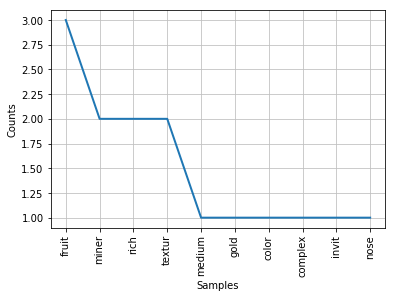

In [140]:
freqgood.plot(10, cumulative=False)

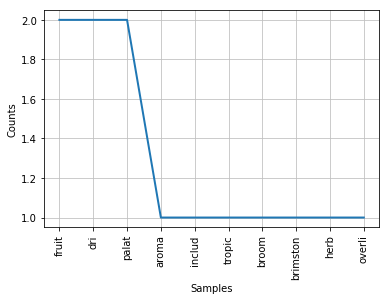

In [139]:
freqbad.plot(10,cumulative=False)

In [188]:
vg_index = df[df["points"] == 100].index
vg = processed[vg_index.tolist()]

In [189]:
lvg= []
for i in (0, len(vg.values)-1):
    for t in vg.values[i]:
        lvg.append(t)

In [190]:
freqvg = nltk.FreqDist(lvg)

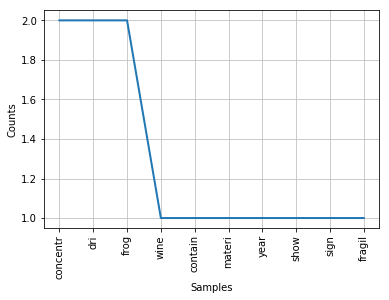

In [191]:
freqvg.plot(10,cumulative = False)

In [187]:
vg

345       [wine, contain, materi, year, show, sign, frag...
7335      [molass, dark, caramel, brown, sugar, wine, oo...
36528     [fabul, wine, greatest, champagn, vintag, cent...
39286     [perfect, wine, classic, vintag, masseto, merl...
42197     [latest, releas, long, regard, portug, icon, w...
45781     [gorgeou, fragrant, wine, open, classic, sangi...
45798     [tast, flight, great, famou, napa, win, cardin...
58352     [magnific, solid, wine, initi, sever, young, s...
89728     [latest, incarn, famou, brand, superb, wine, m...
89729     [releas, great, vintag, chardonnay, champagn, ...
111753    [black, color, stun, wine, gorgeou, rich, dens...
111754    [take, moment, appreci, enorm, intens, overal,...
111755    [finest, cheval, blanc, year, simpli, magnific...
111756    [huge, power, wine, dark, brood, tannin, wine,...
113929    [charl, smith, introduc, high, syrah, smith, w...
114972    [power, ripe, wine, strongli, influenc, tannin...
118058    [wine, dazzl, perfect, sourc, 

In [192]:

for i in range(0,len(processed)):
    for t in processed.values[i]:
        textcorpus = 

0         [aroma, includ, tropic, fruit, broom, brimston...
1         [ripe, fruiti, wine, smooth, structur, firm, t...
2         [tart, snappi, flavor, lime, flesh, rind, domi...
3         [pineappl, rind, lemon, pith, orang, blossom, ...
4         [like, regular, bottl, come, rough, tannic, ru...
5         [blackberri, raspberri, aroma, typic, navarran...
6         [bright, inform, open, aroma, candi, berri, wh...
7         [restrain, wine, offer, spice, profus, balanc,...
8         [savori, dri, thyme, note, accent, sunnier, fl...
9         [great, depth, flavor, fresh, appl, pear, frui...
10        [soft, suppl, plum, envelop, oaki, structur, c...
11        [wine, spici, tight, taut, textur, strongli, m...
12        [slightli, reduc, wine, offer, chalki, tannic,...
13        [domin, drive, aroma, includ, roast, coffe, be...
14        [build, year, gener, winemak, tradit, wineri, ...
15        [zesti, orang, peel, appl, note, abound, sprig...
16        [bake, plum, molass, balsam, v

In [194]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [196]:
doc_clean

[['sugar', 'bad', 'consume', 'sister', 'like', 'sugar', 'father'],
 ['father',
  'spends',
  'lot',
  'time',
  'driving',
  'sister',
  'around',
  'dance',
  'practice'],
 ['doctor',
  'suggest',
  'driving',
  'may',
  'cause',
  'increased',
  'stress',
  'blood',
  'pressure'],
 ['sometimes',
  'feel',
  'pressure',
  'perform',
  'well',
  'school',
  'father',
  'never',
  'seems',
  'drive',
  'sister',
  'better'],
 ['health', 'expert', 'say', 'sugar', 'good', 'lifestyle']]

In [199]:
tc = []
for i in df["description"]:
    tc.append(i)

In [204]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in tc]  

In [205]:
doc_clean

[['aroma',
  'include',
  'tropical',
  'fruit',
  'broom',
  'brimstone',
  'dried',
  'herb',
  'palate',
  'overly',
  'expressive',
  'offering',
  'unripened',
  'apple',
  'citrus',
  'dried',
  'sage',
  'alongside',
  'brisk',
  'acidity'],
 ['ripe',
  'fruity',
  'wine',
  'smooth',
  'still',
  'structured',
  'firm',
  'tannin',
  'filled',
  'juicy',
  'red',
  'berry',
  'fruit',
  'freshened',
  'acidity',
  'already',
  'drinkable',
  'although',
  'certainly',
  'better',
  '2016'],
 ['tart',
  'snappy',
  'flavor',
  'lime',
  'flesh',
  'rind',
  'dominate',
  'green',
  'pineapple',
  'poke',
  'through',
  'crisp',
  'acidity',
  'underscoring',
  'flavor',
  'wine',
  'stainlesssteel',
  'fermented'],
 ['pineapple',
  'rind',
  'lemon',
  'pith',
  'orange',
  'blossom',
  'start',
  'aroma',
  'palate',
  'bit',
  'opulent',
  'note',
  'honeydrizzled',
  'guava',
  'mango',
  'giving',
  'way',
  'slightly',
  'astringent',
  'semidry',
  'finish'],
 ['much',
  '

In [215]:
# Importing Gensim
import gensim
from gensim.corpora import dictionary
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]




AttributeError: module 'gensim.corpora.dictionary' has no attribute 'doc2bow'